In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [20]:
# 添加一个支持中文字符的字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 设置默认字体
plt.rcParams['axes.unicode_minus'] = False


In [25]:
datafile = "C:\\Users\潘敏菊\Desktop\housing-Sheet1.csv"
data = np.fromfile(datafile,sep=' ')
feature_names = ['CRIM','ZN','INDUS','CHA','NOX','RM','AGE','DIS',
                     'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
feature_num = len(feature_names)
data = data.reshape(data.shape[0]//feature_num,feature_num)

In [26]:
 # 对选取的特征进行归一化
maximums, minimums, avgs = data[:, 1:-1].max(axis=0),data[:, 1:-1].min(axis=0),data[:,1:-1].mean(axis=0)
data[:, 1:-1] = (data[:, 1:-1] - minimums) / (maximums - minimums)
 

# 划分训练集，测试集
ratio = 0.8
offset = int(data.shape[0]*ratio)
train_data = data[:offset]
test_data = data[offset:]

x_train = train_data[:, :-1]  # 训练集的特征值
Y_train = train_data[:, -1:]  # 训练集的目标值
x_test = test_data[:, :-1]  # 测试集的特征值
Y_test = test_data[:, -1:]  # 测试集的目标值




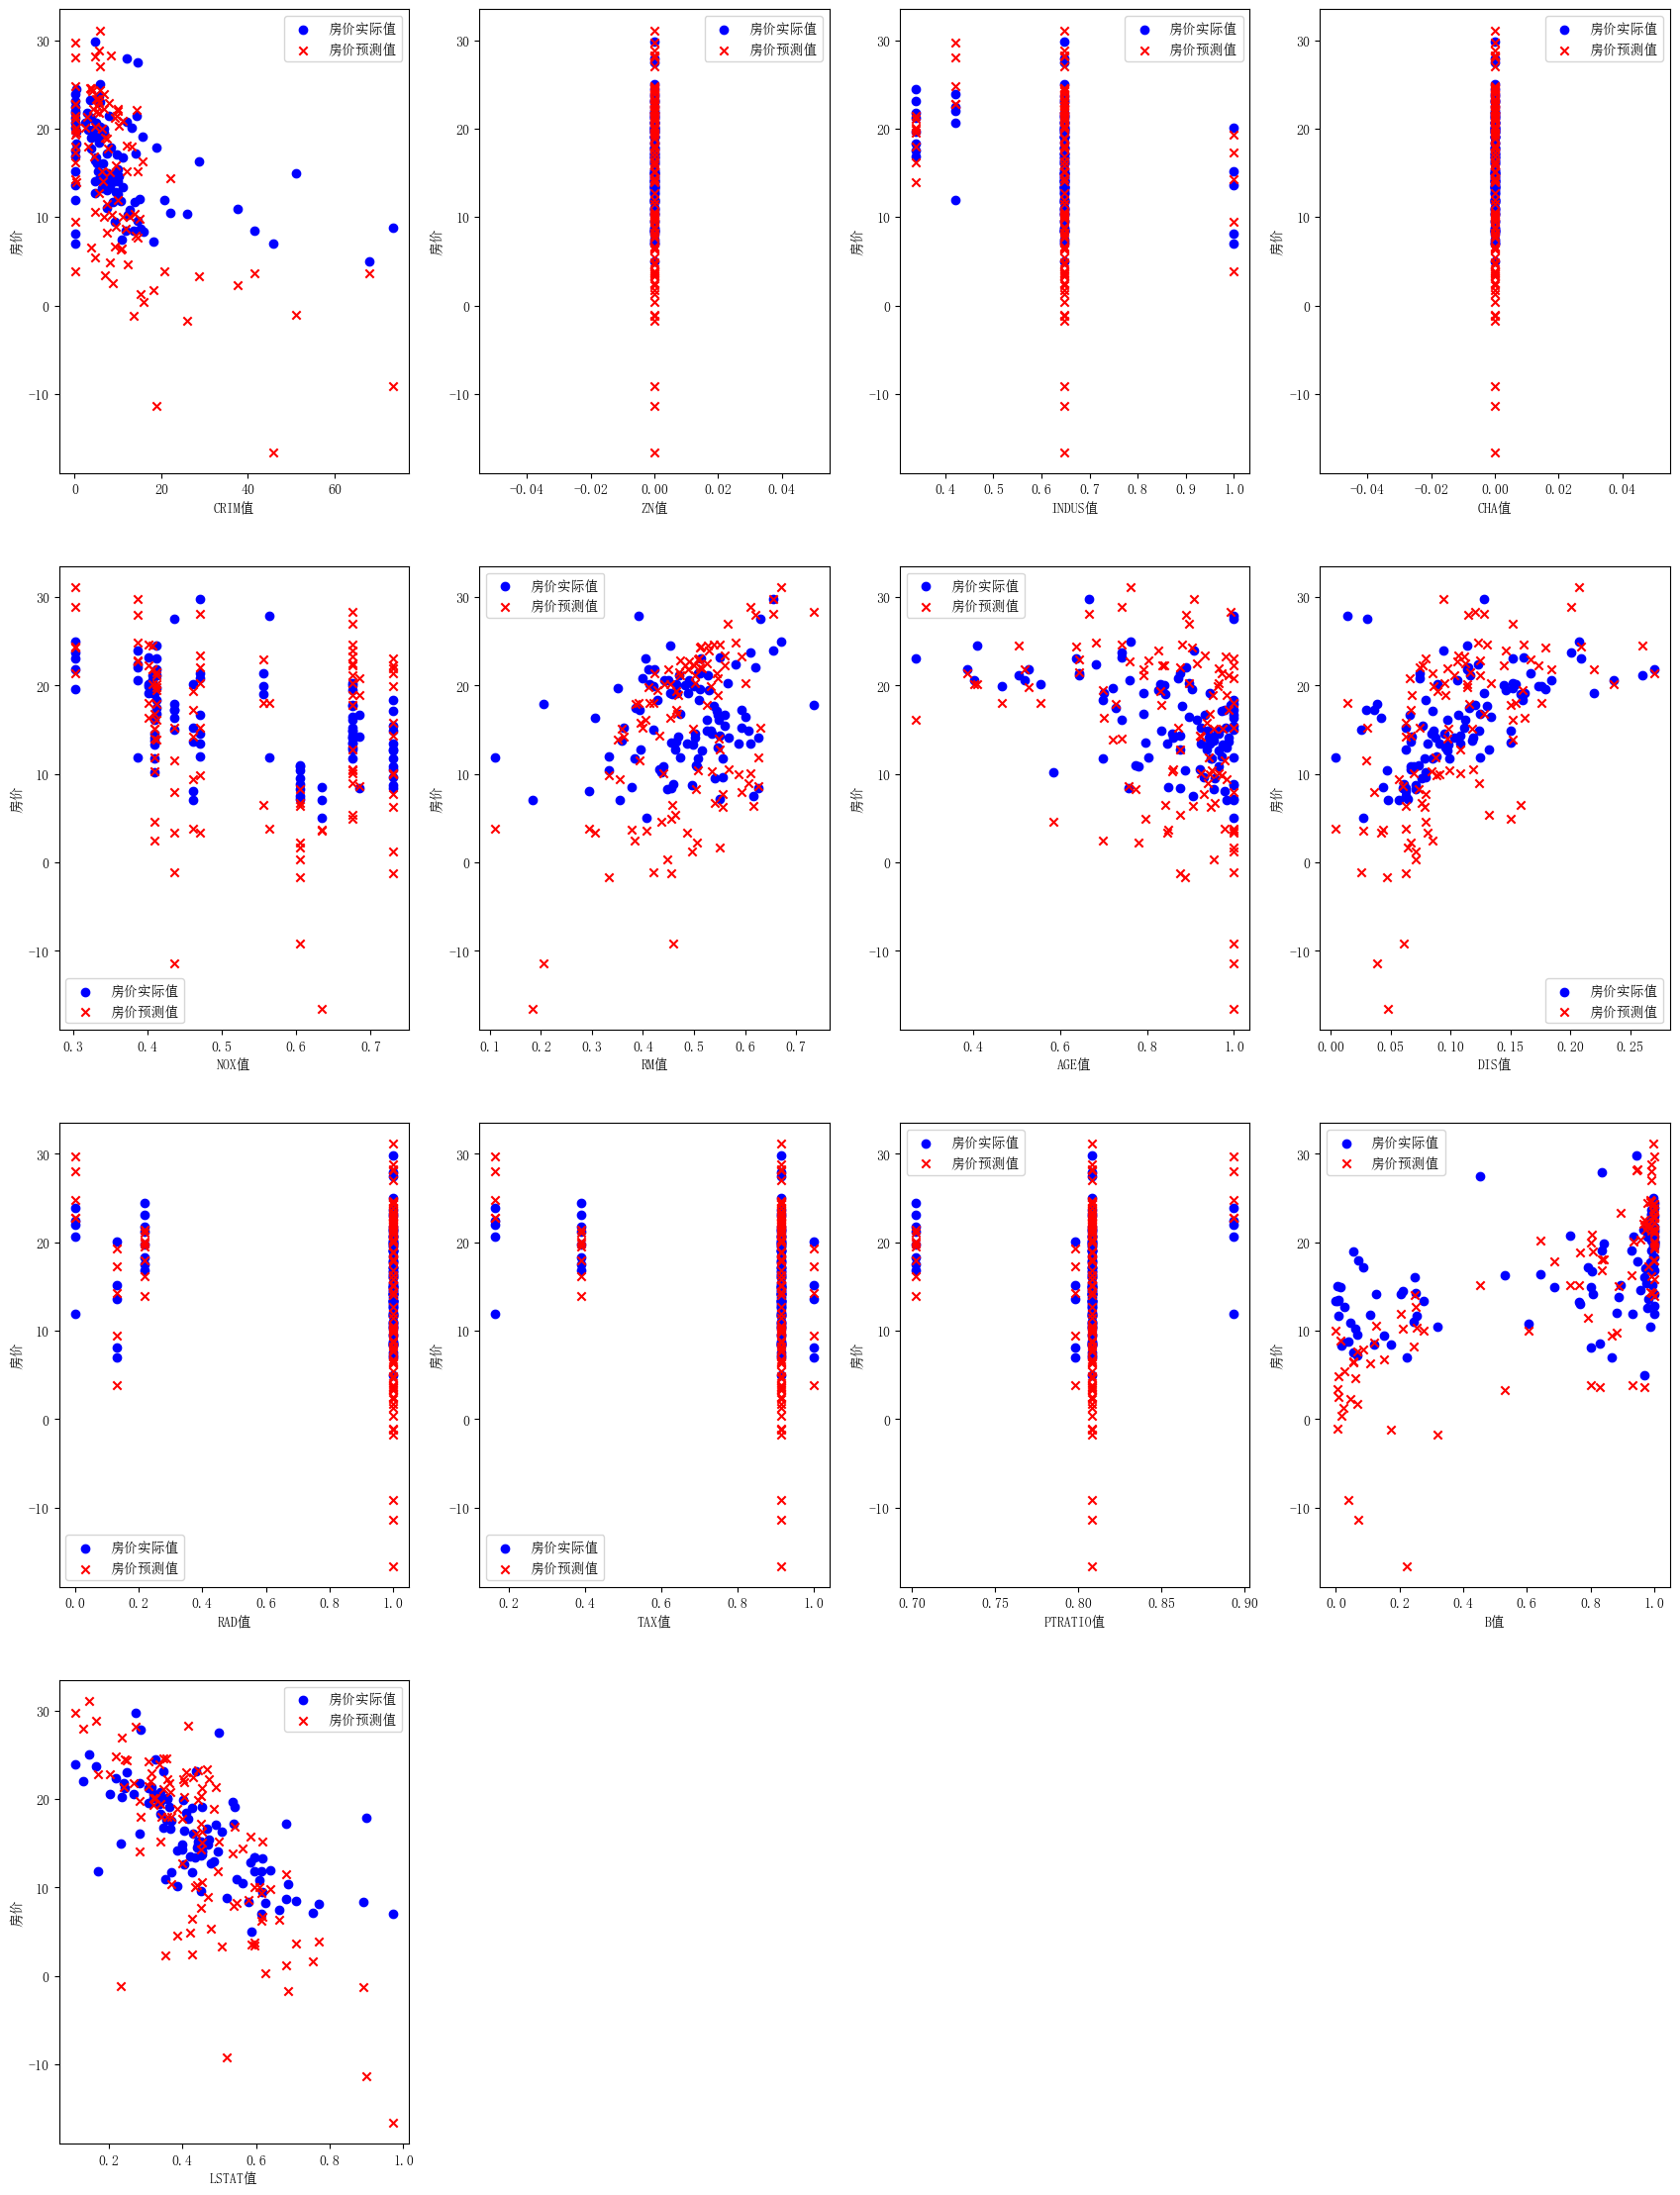

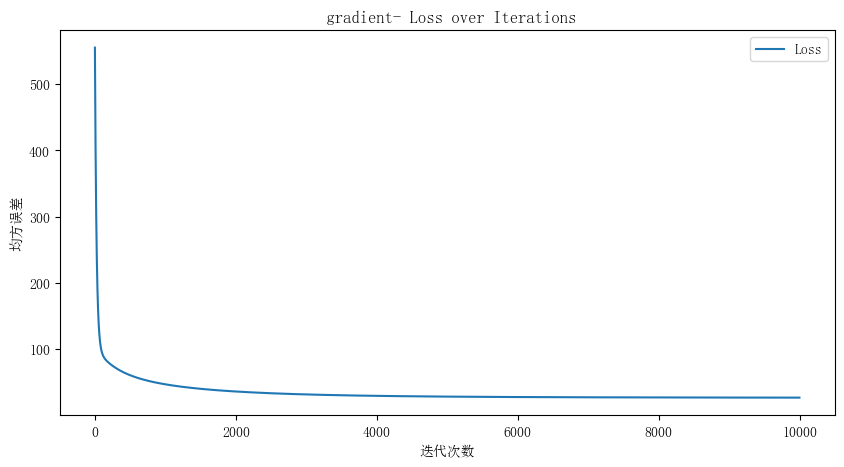

均方误差为：49.698095


In [27]:
#初始化权重
weight = np.random.randn(x_train.shape[1]).reshape(-1,1)#weights是一竖条，有14行，每行只有一个数

losses = [] 
#梯度下降参数
learning_rate = 0.01

epochs = 10000

tolerance = 1e-5


#梯度下降
for epoch in range(epochs):
    Y_pred = x_train.dot(weight).reshape(-1,1)#也是一竖条，每行只有一个数
    error = Y_pred-Y_train#同上
    loss = np.mean(error**2)  # 计算当前均方误差作为损失  
    losses.append(loss)  # 将损失添加到列表中
    # print(y_train.shape)
    # print(y_pred.shape)
    # print(error.shape)
    gradient = x_train.T.dot(error)/len(x_train)#梯度是由偏导数组成的向量
    # print(gradient.shape)
    weight -= learning_rate*gradient
    #检查收敛性
    if np.linalg.norm(gradient)<tolerance:
        break
#预测
Y_pred_test = np.dot(x_test, weight)

#计算均方误差
error = ((Y_test-Y_pred_test)**2).mean()

# 设置画布大小，以适应多个图
plt.figure(figsize=(21, 28))
# 创建一个 4x4 的子图网格，并设置最后一行只有一个子图
#画13个散点图，查看预测值与实际值
for i in range(13):
    # 使用 subplots() 函数创建一个子图，sharex=True 和 sharey=True 使得所有子图共享x轴和y轴刻度
    if i < 12:
        plt.subplot(4, 4, i + 1)  # 4x4网格中的第i+1个子图
    else:
        plt.subplot(4, 4, 13)  # 最后一行只有一个子图

    # 绘制散点图
    plt.scatter(x_test[:, i], Y_test, color='blue', label='房价实际值')  # 使用scatter代替plot来创建散点图
    plt.scatter(x_test[:, i], Y_pred_test, color='red', marker='x', label='房价预测值')  # 使用不同的标记来区分预测值

    plt.legend()
    plt.xlabel('%s值'%(feature_names[i]))
    plt.ylabel('房价')
    
    
# 绘制损失随迭代次数的变化  
plt.figure(figsize=(10, 5))  
plt.plot(losses, label='Loss')  
plt.xlabel('迭代次数')  
plt.ylabel('均方误差')  
plt.title(' gradient- Loss over Iterations')  
plt.legend()  
plt.show()
print('均方误差为：%f'%(error))
